In [ ]:
pip install pandas numpy matplotlib seaborn

**Load and Clean the Data:**

Import the datasets: Customers.csv, Products.csv, and Transactions.csv.

Inspect for missing values, duplicates, and outliers.

Ensure proper formatting of columns like dates and numeric fields.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

# Display the first few rows of each dataset
print("Customers dataset preview:")
print(customers.head())

print("Products dataset preview:")
print(products.head())

print("Transactions dataset preview:")
print(transactions.head())


Customers dataset preview:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
Products dataset preview:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
Transactions dataset preview:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1

In [ ]:
# Check for missing values
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())

# Check for duplicates
print(customers.duplicated().sum())
print(products.duplicated().sum())
print(transactions.duplicated().sum())

# Convert date columns to datetime
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

# Data types of all columns
print(customers.dtypes)
print(products.dtypes)
print(transactions.dtypes)


CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64
0
0
0
CustomerID              object
CustomerName            object
Region                  object
SignupDate      datetime64[ns]
dtype: object
ProductID       object
ProductName     object
Category        object
Price          float64
dtype: object
TransactionID              object
CustomerID                 object
ProductID                  object
TransactionDate    datetime64[ns]
Quantity                    int64
TotalValue                float64
Price                     float64
dtype: object


**Data Merging:**

Merge all three datasets based on their respective keys (e.g., CustomerID, ProductID).

You will likely want to join the Customers and Transactions datasets on CustomerID and then join with Products on ProductID.

In [ ]:
# Merge transactions with customers and products
merged_data = transactions.merge(customers, on='CustomerID', how='left')
merged_data = merged_data.merge(products, on='ProductID', how='left')

# Display the first few rows of merged data
print(merged_data.head())


  TransactionID CustomerID ProductID     TransactionDate  Quantity  \
0        T00001      C0199      P067 2024-08-25 12:38:23         1   
1        T00112      C0146      P067 2024-05-27 22:23:54         1   
2        T00166      C0127      P067 2024-04-25 07:38:55         1   
3        T00272      C0087      P067 2024-03-26 22:55:37         2   
4        T00363      C0070      P067 2024-03-21 15:10:10         3   

   TotalValue  Price_x     CustomerName         Region SignupDate  \
0      300.68   300.68   Andrea Jenkins         Europe 2022-12-03   
1      300.68   300.68  Brittany Harvey           Asia 2024-09-04   
2      300.68   300.68  Kathryn Stevens         Europe 2024-04-04   
3      601.36   300.68  Travis Campbell  South America 2024-04-11   
4      902.04   300.68    Timothy Perez         Europe 2022-03-15   

                       ProductName     Category  Price_y  
0  ComfortLiving Bluetooth Speaker  Electronics   300.68  
1  ComfortLiving Bluetooth Speaker  Electronic

**Initial Exploratory Data Analysis:**

Descriptive statistics: Check for general statistics (mean, median, mode, standard deviation, etc.).

Distribution: Visualize the distribution of prices, transaction totals, and customer signups.

Time-series analysis: Analyze the trend of transactions over time to understand seasonality and purchasing patterns.

Categorical analysis: Investigate the product categories, regions of customers, and the number of transactions per customer.

Customer behavior: Look at repeat purchases and the average spend per customer.

In [ ]:
# Summary statistics of the numeric columns
print(merged_data.describe())

# Check for unique values
print(merged_data.nunique())


                     TransactionDate     Quantity   TotalValue     Price_x  \
count                           1000  1000.000000  1000.000000  1000.00000   
mean   2024-06-23 15:33:02.768999936     2.537000   689.995560   272.55407   
min              2023-12-30 15:29:12     1.000000    16.080000    16.08000   
25%       2024-03-25 22:05:34.500000     2.000000   295.295000   147.95000   
50%       2024-06-26 17:21:52.500000     3.000000   588.880000   299.93000   
75%              2024-09-19 14:19:57     4.000000  1011.660000   404.40000   
max              2024-12-28 11:00:00     4.000000  1991.040000   497.76000   
std                              NaN     1.117981   493.144478   140.73639   

                          SignupDate     Price_y  
count                           1000  1000.00000  
mean   2023-07-09 02:49:55.199999744   272.55407  
min              2022-01-22 00:00:00    16.08000  
25%              2022-09-17 12:00:00   147.95000  
50%              2023-07-23 00:00:00   299

**Visualizations:**

Histograms, box plots, and scatter plots to visualize distribution.
Bar charts for categorical variables like regions or product categories.

Heatmaps to visualize correlations between features like price and total value.


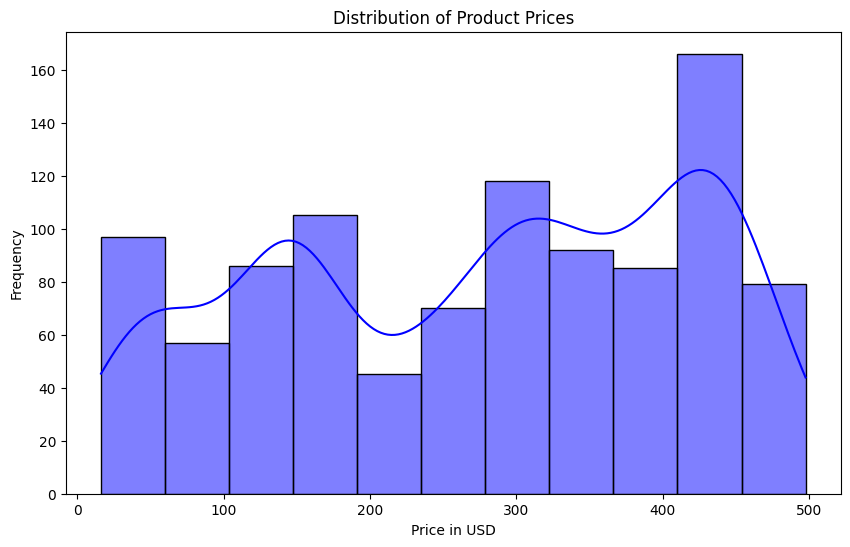

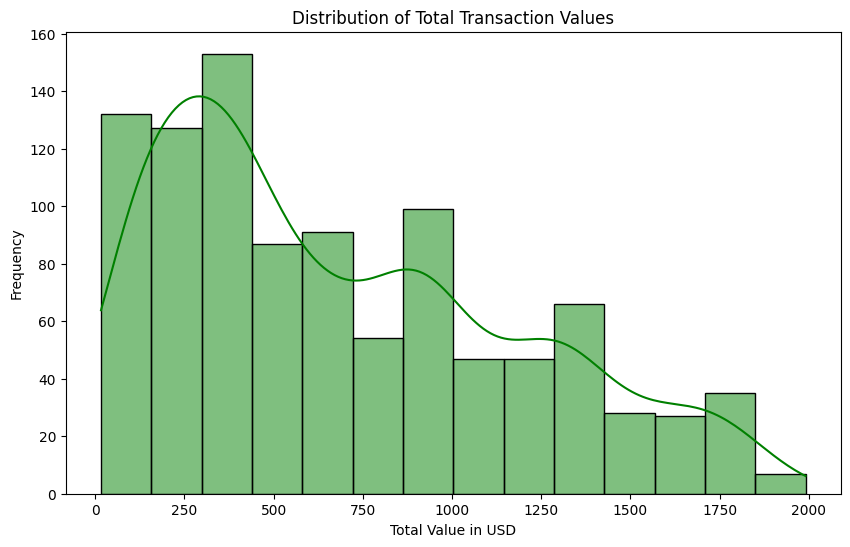

In [ ]:
# Distribution of Product Prices
plt.figure(figsize=(10,6))
sns.histplot(merged_data['Price_y'], kde=True, color='blue')
plt.title('Distribution of Product Prices')
plt.xlabel('Price in USD')
plt.ylabel('Frequency')
plt.show()

# Distribution of Total Transaction Values
plt.figure(figsize=(10,6))
sns.histplot(merged_data['TotalValue'], kde=True, color='green')
plt.title('Distribution of Total Transaction Values')
plt.xlabel('Total Value in USD')
plt.ylabel('Frequency')
plt.show()


<ipython-input-8-e3f7d7f114c1>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_counts.index, y=region_counts.values, palette='viridis')


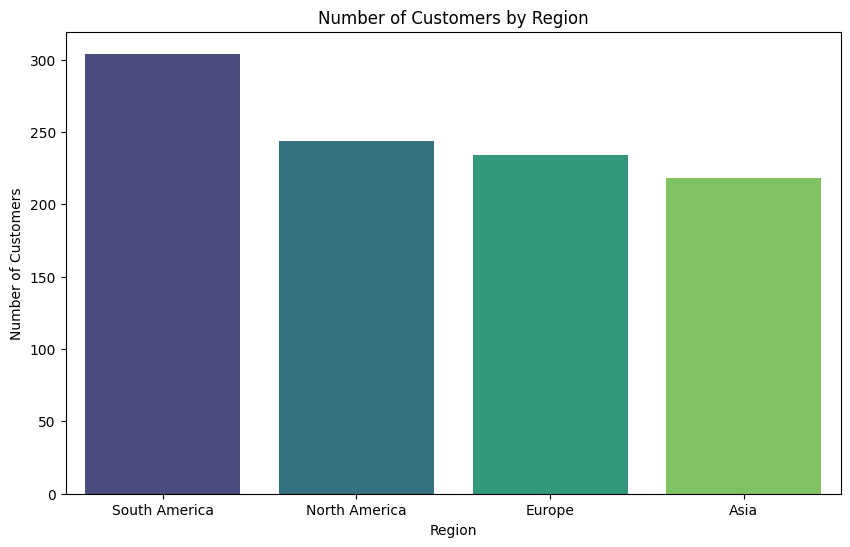

In [ ]:
# Number of customers per region
region_counts = merged_data['Region'].value_counts()

# Plotting region-wise customer count
plt.figure(figsize=(10,6))
sns.barplot(x=region_counts.index, y=region_counts.values, palette='viridis')
plt.title('Number of Customers by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.show()


<ipython-input-9-a5709b658f17>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_sales.index, y=product_sales.values, palette='Blues')


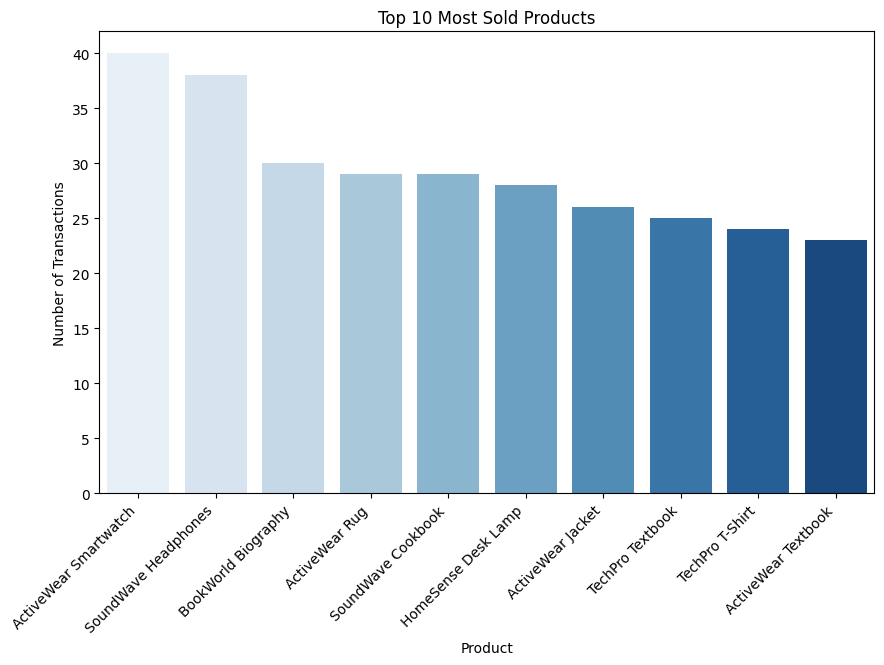

In [ ]:
# Product sales frequency
product_sales = merged_data['ProductName'].value_counts().head(10)

# Plotting top 10 most sold products
plt.figure(figsize=(10,6))
sns.barplot(x=product_sales.index, y=product_sales.values, palette='Blues')
plt.title('Top 10 Most Sold Products')
plt.xlabel('Product')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45, ha='right')
plt.show()


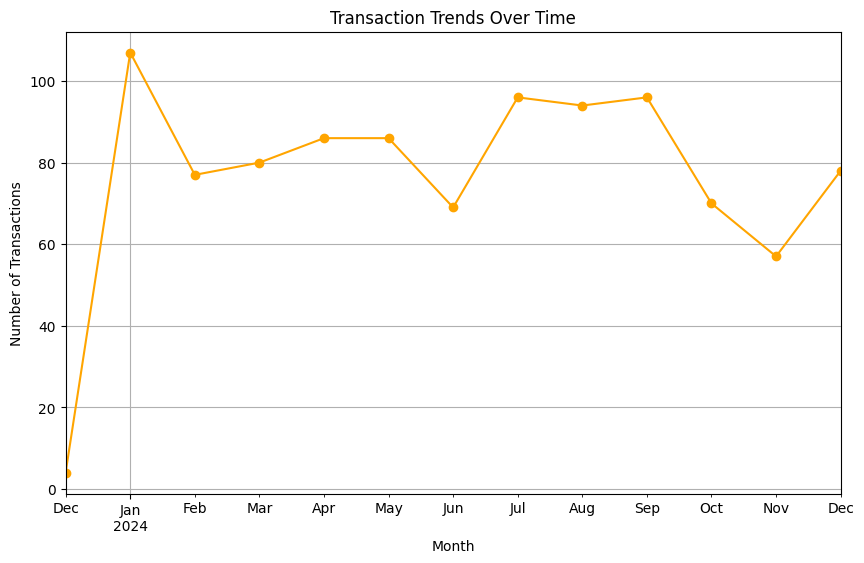

In [ ]:
# Grouping by transaction date to analyze the trend over time
transaction_trends = merged_data.groupby(merged_data['TransactionDate'].dt.to_period('M')).size()

# Plotting the trend over time
plt.figure(figsize=(10,6))
transaction_trends.plot(kind='line', marker='o', color='orange')
plt.title('Transaction Trends Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.grid(True)
plt.show()


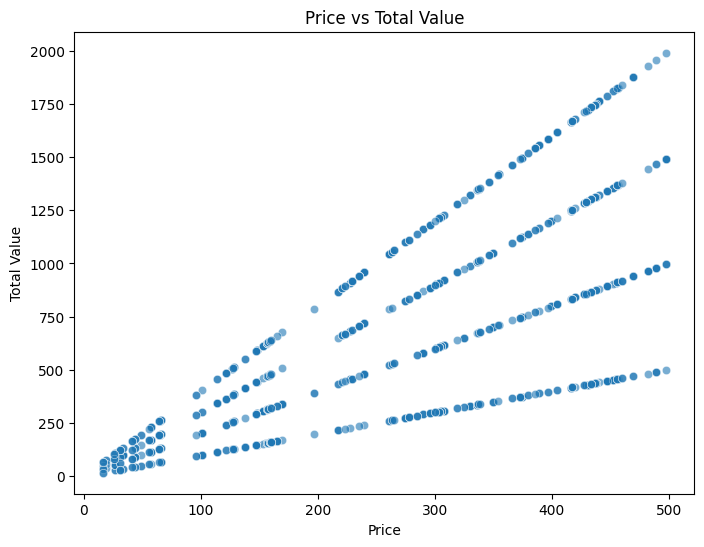

In [ ]:
# Correlation between Price and Total Value
plt.figure(figsize=(8,6))
sns.scatterplot(data=merged_data, x='Price_y', y='TotalValue', alpha=0.6)
plt.title('Price vs Total Value')
plt.xlabel('Price')
plt.ylabel('Total Value')
plt.show()


Region
South America    219352.56
Europe           166254.63
North America    152313.40
Asia             152074.97
Name: TotalValue, dtype: float64


<ipython-input-13-e0c6ab29dc7a>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_revenue.index, y=region_revenue.values, palette='Blues')


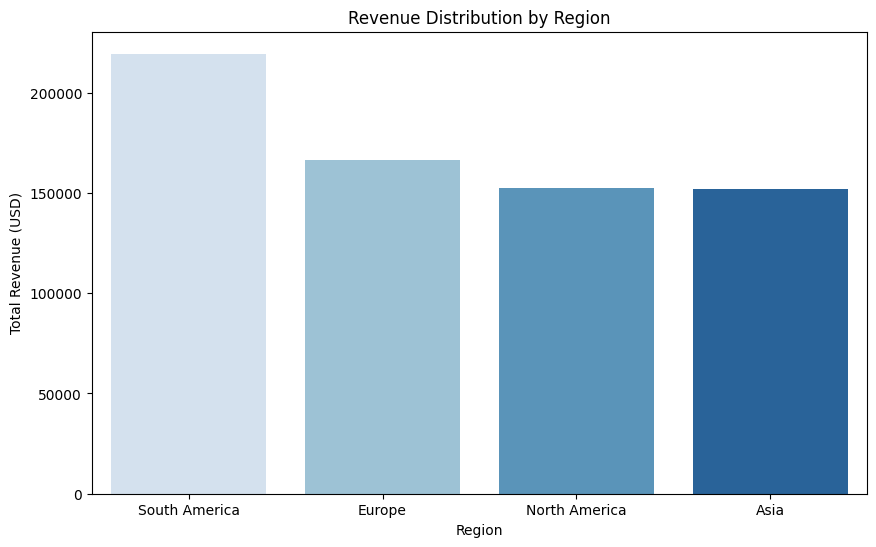

In [ ]:
# Calculate revenue per region
region_revenue = merged_data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
print(region_revenue)

# Plotting region revenue distribution
plt.figure(figsize=(10,6))
sns.barplot(x=region_revenue.index, y=region_revenue.values, palette='Blues')
plt.title('Revenue Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Total Revenue (USD)')
plt.show()


<ipython-input-14-bed596c6dc08>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_revenue.index[:10], y=product_revenue.values[:10], palette='viridis')


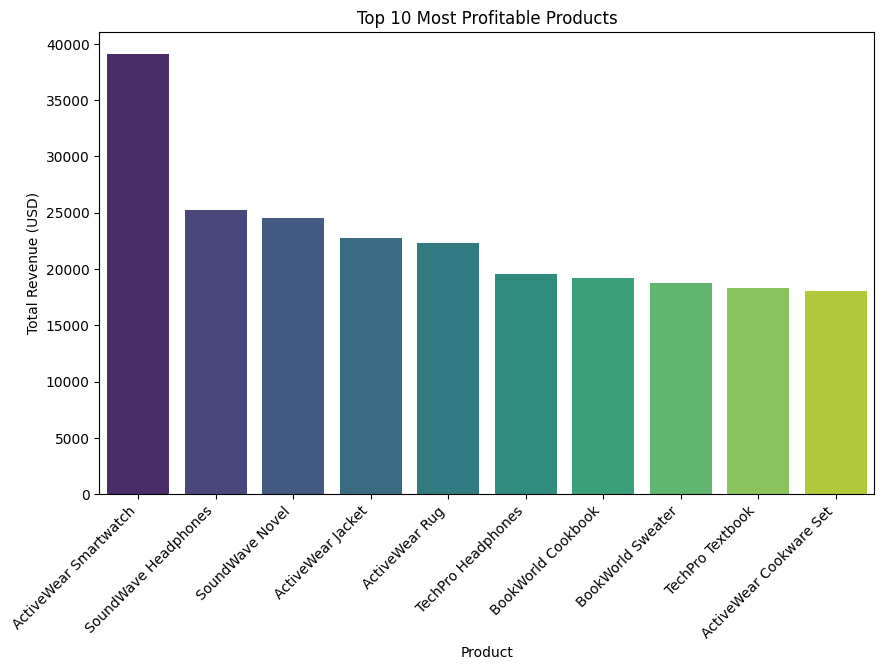

In [ ]:
# Grouping by product and summing up the total revenue for each product
product_revenue = merged_data.groupby('ProductName')['TotalValue'].sum().sort_values(ascending=False)

# Plotting most profitable products
plt.figure(figsize=(10,6))
sns.barplot(x=product_revenue.index[:10], y=product_revenue.values[:10], palette='viridis')
plt.title('Top 10 Most Profitable Products')
plt.xlabel('Product')
plt.ylabel('Total Revenue (USD)')
plt.xticks(rotation=45, ha='right')
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict

# Load the datasets
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

# Merge Transactions with Customers and Products
merged_data = transactions.merge(customers, on='CustomerID', how='left')
merged_data = merged_data.merge(products, on='ProductID', how='left')

# Check the first few rows
print(merged_data.head())


  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue  Price_x     CustomerName         Region  SignupDate  \
0      300.68   300.68   Andrea Jenkins         Europe  2022-12-03   
1      300.68   300.68  Brittany Harvey           Asia  2024-09-04   
2      300.68   300.68  Kathryn Stevens         Europe  2024-04-04   
3      601.36   300.68  Travis Campbell  South America  2024-04-11   
4      902.04   300.68    Timothy Perez         Europe  2022-03-15   

                       ProductName     Category  Price_y  
0  ComfortLiving Bluetooth Speaker  Electronics   300.68  
1  ComfortLiving Bluetooth Speaker

In [ ]:
# One-hot encode the region feature
region_encoder = LabelEncoder()
customers['Region_encoded'] = region_encoder.fit_transform(customers['Region'])

# Calculate the total amount spent by each customer and the number of purchases per product category
customer_spending = merged_data.groupby(['CustomerID', 'Category'])['TotalValue'].sum().unstack(fill_value=0)

# Merge demographics with spending data
customer_profiles = customers.set_index('CustomerID').join(customer_spending, on='CustomerID')

# Check customer profiles
print(customer_profiles.head())


                  CustomerName         Region  SignupDate  Region_encoded  \
CustomerID                                                                  
C0001         Lawrence Carroll  South America  2022-07-10               3   
C0002           Elizabeth Lutz           Asia  2022-02-13               0   
C0003           Michael Rivera  South America  2024-03-07               3   
C0004       Kathleen Rodriguez  South America  2022-10-09               3   
C0005              Laura Weber           Asia  2022-08-15               0   

              Books  Clothing  Electronics  Home Decor  
CustomerID                                              
C0001        114.60      0.00      2827.30      412.62  
C0002          0.00   1025.46         0.00      837.28  
C0003          0.00    122.36      1385.20     1217.82  
C0004       1888.48      0.00      1355.74     2110.66  
C0005          0.00      0.00      1180.38      853.86  


In [ ]:
# Fill missing values with 0 for missing categories
customer_profiles = customer_profiles.fillna(0)

# Calculate cosine similarity between customer profiles
similarity_matrix = cosine_similarity(customer_profiles.drop(columns=['CustomerName', 'SignupDate', 'Region']))
similarity_df = pd.DataFrame(similarity_matrix, index=customer_profiles.index, columns=customer_profiles.index)

# Check the similarity matrix for one customer (e.g., C0001)
print(similarity_df['C0001'].head())


CustomerID
C0001    1.000000
C0002    0.091260
C0003    0.835992
C0004    0.548001
C0005    0.885670
Name: C0001, dtype: float64


In [ ]:
# Generate the Lookalike model for the first 20 customers
lookalike_recommendations = defaultdict(list)

for customer_id in customers['CustomerID'][:20]:
    # Get the similarity scores for the current customer
    similarities = similarity_df[customer_id]

    # Sort by similarity score (descending) and exclude the customer itself (similarity score = 1.0)
    sorted_similarities = similarities.sort_values(ascending=False)
    top_3_similar_customers = sorted_similarities[1:4]  # Exclude the first one, which is the customer itself

    # Add the top 3 similar customers to the recommendation list
    for similar_customer_id, score in top_3_similar_customers.items():
        lookalike_recommendations[customer_id].append((similar_customer_id, score))

# Convert recommendations into a DataFrame
lookalike_data = []

for customer_id, recommendations in lookalike_recommendations.items():
    for similar_customer_id, score in recommendations:
        lookalike_data.append([customer_id, similar_customer_id, score])

lookalike_df = pd.DataFrame(lookalike_data, columns=['CustomerID', 'LookalikeID', 'SimilarityScore'])

# Save the lookalike recommendations to a CSV
lookalike_df.to_csv('Lookalike.csv', index=False)
